<a href="https://colab.research.google.com/github/EliW7/Lab/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CRIM   ZN  INDUS  CHAS   NOX    RM  AGE    DIS  RAD   TAX  PTRATIO      B  LSTAT  PRICE
0.00632 18.0   2.31     0 0.538 6.575 65.2 4.0900    1 296.0     15.3 396.90   4.98   24.0
0.02731  0.0   7.07     0 0.469 6.421 78.9 4.9671    2 242.0     17.8 396.90   9.14   21.6
0.02729  0.0   7.07     0 0.469 7.185 61.1 4.9671    2 242.0     17.8 392.83   4.03   34.7
0.03237  0.0   2.18     0 0.458 6.998 45.8 6.0622    3 222.0     18.7 394.63   2.94   33.4
0.06905  0.0   2.18     0 0.458 7.147 54.2 6.0622    3 222.0     18.7 396.90   5.33   36.2
0.02985  0.0   2.18     0 0.458 6.430 58.7 6.0622    3 222.0     18.7 394.12   5.21   28.7
num samples = (506, 14), num attributes = (506, 14)
beta0 = -34.67, beta1 = 9.10, R^2 = 0.4835
Attribute      R^2
     CRIM 0.150780
       ZN 0.129921
    INDUS 0.233990
     CHAS 0.030716
      NOX 0.182603
       RM 0.483525
      AGE 0.142095
      DIS 0.062464
      RAD 0.145639
      TAX 0.219526
  PTRATIO 0.257847
        B 0.111196
    LSTAT 0.544146


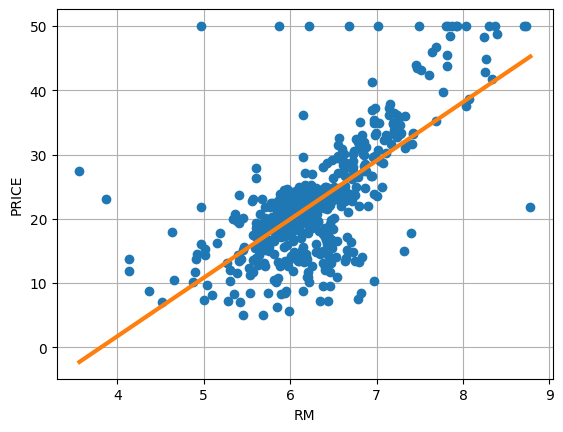

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]
ab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'housing/housing.data',
                 header=None, sep='\s+', names=names, na_values='?') # I was used delim_whitespace=True from exmaple but does not work
print(ab.head(6).to_string(index=False)) # to show up the first 6 row of data frame with out the index
xxx = ab.shape
yy = ab.shape
print(f"num samples = {xxx}, num attributes = {yy}")

x = ab['RM'].to_numpy()
y = ab['PRICE'].to_numpy()
z = 'RM'

def fit_linear(x, y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x,
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # The calculation
    xx = np.mean(x)
    yyy = np.mean(y)
    myx = np.mean((y - yyy) * (x - xx))
    mxx = np.mean((x - xx) ** 2)
    beta1 = myx / mxx
    beta0 = yyy - beta1 * xx
    yhat = beta0 + beta1 * x
    R = np.sum((y - yyy) ** 2)
    Rm = np.sum((y - yhat) ** 2)
    rsq = 1 - (Rm / R)

    return beta0, beta1, rsq

beta0, beta1, rsq = fit_linear(x, y)

xp = np.linspace(np.min(x), np.max(x), 120) # tried mutiple value like 506, 100, 50... but does not fit then use max and min
yhat = beta0 + beta1 * xp

plt.plot(x,y,'o') # structure from the demo
plt.plot(xp, yhat, '-', linewidth=3)
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.grid(True)

print(f"beta0 = {beta0:.2f}, beta1 = {beta1:.2f}, R^2 = {rsq:.4f}")
R1 = []
for i in ab.columns[:-1]:
    x = ab[i].to_numpy()
    xx = np.mean(x)
    yyy = np.mean(y)
    myx = np.mean((y - yyy) * (x - xx))
    mxx = np.mean((x - xx) ** 2)
    beta1 = myx / mxx
    beta0 = yyy - beta1 * xx
    yhat = beta0 + beta1 * x
    R = np.sum((y - yyy) ** 2)
    Rm = np.sum((y - yhat) ** 2)
    rsq = 1 - (Rm / R)   # copy from previous part

    R1.append((i, rsq))
r = pd.DataFrame(R1, columns=["Attribute", "R^2"]) # the dataframe
print(r.to_string(index=False)) # sample output without index so removed it